<a href="https://colab.research.google.com/github/MrRozum/DeepLearning_Winter22/blob/main/HW_week01_tier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [2]:
!git clone https://github.com/RiskModellingResearch/DeepLearning_Winter22.git

Cloning into 'DeepLearning_Winter22'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 32 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
X = pd.read_csv('/content/DeepLearning_Winter22/week_01/data/X_cat.csv', sep="\t", index_col=0)
y = pd.read_csv('/content/DeepLearning_Winter22/week_01/data/y_cat.csv', sep="\t", index_col=0, names=['status']).reset_index(drop=True)
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

Shape X: (26729, 37)
Shape y: (26729, 1)


In [5]:
pd.set_option('display.max_columns', None)
X.head()

,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,TabbyColor,MixBreed,Domestic,Shorthair,Longhair,Year,Month,Day,Hour,Breed_Chihuahua Shorthair Mix,Breed_Domestic Medium Hair Mix,Breed_Domestic Shorthair Mix,Breed_German Shepherd Mix,Breed_Labrador Retriever Mix,Breed_Pit Bull Mix,Breed_Rare,Sex_Female,Sex_Male,Sex_Unknown,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,1,365.0,1,7,0.000157,1,0.032919,0.463624,0,1,0,0,0,2014,2,12,14.366667,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,365.0,1,5,0.000655,0,0.008092,0.015005,1,1,1,1,0,2013,10,13,8.733333,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,730.0,1,6,0.000052,1,0.026293,0.357521,0,1,0,0,0,2015,1,31,9.466667,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,0,21.0,0,7,0.285871,0,0.000471,0.058418,0,1,1,1,0,2014,7,11,15.150000,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,1,730.0,0,7,0.285871,0,0.023831,0.075353,0,0,0,0,0,2013,11,15,8.866667,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26729 entries, 0 to 26728
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IsDog                           26729 non-null  int64  
 1   Age                             26729 non-null  float64
 2   HasName                         26729 non-null  int64  
 3   NameLength                      26729 non-null  int64  
 4   NameFreq                        26729 non-null  float64
 5   MixColor                        26729 non-null  int64  
 6   ColorFreqAsIs                   26729 non-null  float64
 7   ColorFreqBase                   26729 non-null  float64
 8   TabbyColor                      26729 non-null  int64  
 9   MixBreed                        26729 non-null  int64  
 10  Domestic                        26729 non-null  int64  
 11  Shorthair                       26729 non-null  int64  
 12  Longhair                        

In [7]:
y.value_counts()

status         
Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
dtype: int64

Combine "Died" and "Euthanasia" classes as there is a small fraction of "Died" animals

In [8]:
y[y == 'Died'] = 'Euthanasia'

In [9]:
if y.nunique()[0] == 4:
  print("Good") 

Good


In [10]:
# encoding classes
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 1, 0, ..., 0, 3, 3])

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


In [11]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

NameError: ignored

<Figure size 1440x720 with 0 Axes>

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

1) Идеальную модель построить не получится, т.к. невозможно строго разделить выборку на 2 класса со 100% точностью. В общем и целом можно утверждать, что выборка разделима, но точно нелинейно разделима. Т.о. предварительно можно утверждать, что логрегрессия и одиночное дерево решений будут показывать очень слабый результат. Случайный лес и бустинг ожидаемо покажут результат выше среднего за счет хоть какой-то способности в аппроксимировать нелинено разделимые выборки. Нейросеть ожидаемо покажет наилучший результат с accuracy > 90%, т.к. за счет своей нелинейности сможет хорошо отобрать  таргеты, находящиеся в центре облака признаков


После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

Так как логистическая регрессия модель, линейная, она требует стандартизации признакового пространства. Применим standartscaler к колонке "age".

In [13]:
from sklearn.preprocessing import StandardScaler

#list for cols to scale
cols_to_scale = ['Age']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(X[cols_to_scale])

#scale selected data
X[cols_to_scale] = scaler.transform(X[cols_to_scale])

In [14]:
X.Age

0       -0.396362
1       -0.396362
2       -0.059153
3       -0.714170
4       -0.059153
           ...   
26724   -0.705855
26725   -0.650424
26726    0.615266
26727   -0.707703
26728   -0.396362
Name: Age, Length: 26729, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(X.drop(['Year', 'Month',	'Day', 'Hour'], axis=1), y, test_size = 0.33, stratify=y, random_state=46)

In [16]:
y_test

array([1, 0, 0, ..., 0, 0, 3])

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

#########################################
# Ваш код для Логистической регрессии
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
logreg_loss = log_loss(y_test, clf.predict_proba(X_test))
print(logreg_loss)

0.8947638415257214


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
predict_logit =  clf.predict(X_test)
predict_log_proba = clf.predict_log_proba(X_test)
#########################################
print(predict_logit[0])
print(predict_log_proba[0])

3
[-5.97264663 -1.91520838 -5.35583541 -0.16792072]


In [19]:
print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')


Точность нашей модели 0.6356422174356648


ValueError: ignored

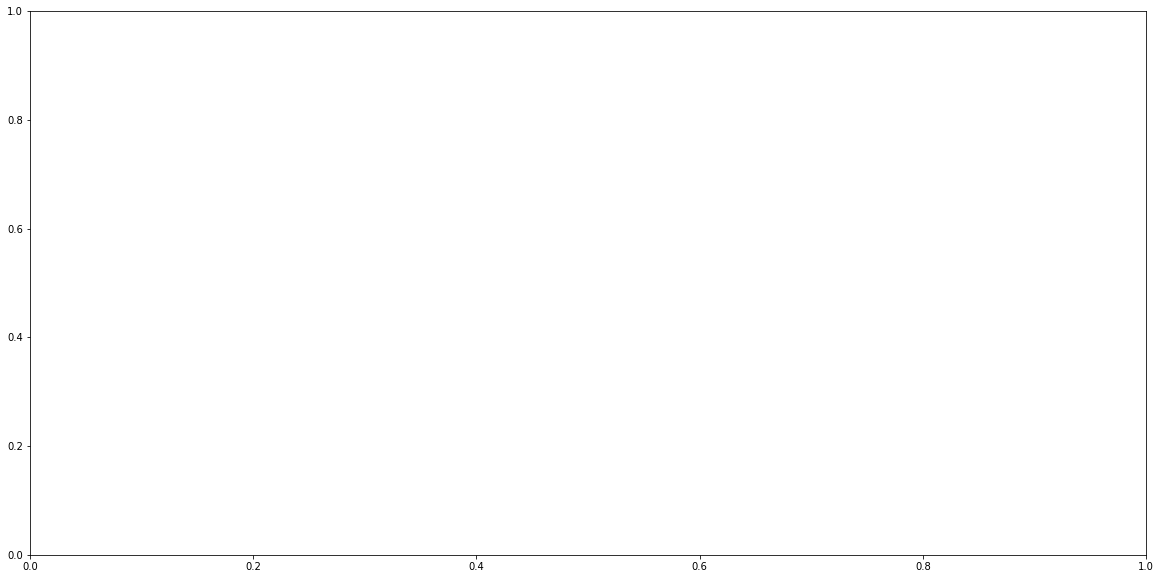

In [20]:



# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['Age'], X_test['HasName'], c = predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

In [23]:
#feature engenering
#!pip install featuretools
import featuretools as ft

     |████████████████████████████████| 339 kB 5.2 MB/s 
     |████████████████████████████████| 160 kB 51.9 MB/s 
     |████████████████████████████████| 15.7 MB 49.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.1 MB/s 
     |████████████████████████████████| 280 kB 39.1 MB/s 
     |████████████████████████████████| 830 kB 40.2 MB/s 
     |████████████████████████████████| 596 kB 41.3 MB/s 
     |████████████████████████████████| 133 kB 40.6 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: psutil
    Found existing installation: 

In [25]:
X.head()

,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,TabbyColor,MixBreed,Domestic,Shorthair,Longhair,Year,Month,Day,Hour,Breed_Chihuahua Shorthair Mix,Breed_Domestic Medium Hair Mix,Breed_Domestic Shorthair Mix,Breed_German Shepherd Mix,Breed_Labrador Retriever Mix,Breed_Pit Bull Mix,Breed_Rare,Sex_Female,Sex_Male,Sex_Unknown,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
0,1,-0.396362,1,7,0.000157,1,0.032919,0.463624,0,1,0,0,0,2014,2,12,14.366667,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,-0.396362,1,5,0.000655,0,0.008092,0.015005,1,1,1,1,0,2013,10,13,8.733333,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,-0.059153,1,6,0.000052,1,0.026293,0.357521,0,1,0,0,0,2015,1,31,9.466667,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,0,-0.714170,0,7,0.285871,0,0.000471,0.058418,0,1,1,1,0,2014,7,11,15.150000,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,1,-0.059153,0,7,0.285871,0,0.023831,0.075353,0,0,0,0,0,2013,11,15,8.866667,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0


In [32]:
!pip install woodwork

In [33]:
from woodwork.logical_types import Categorical   

In [54]:
import featuretools as ft
# Make an entityset and add the entity
# Entity set with id animals
es = ft.EntitySet(id = 'animals')
# es = es.add_dataframe(entity_id = 'animals', dataframe = X,
#                               make_index = True, index = 'animal_id')
es = es.add_dataframe(
    dataframe_name="animals",
    dataframe=X,
    index="animal_id",
    make_index=True,
    logical_types={
        "IsDog": Categorical,
        "HasName": Categorical,
        "MixColor": Categorical,
        "TabbyColor": Categorical,
        "MixBreed": Categorical,
        "Domestic": Categorical,
        "Shorthair": Categorical,
        "Longhair": Categorical,
        'Weekday_0': Categorical,
        'Weekday_1': Categorical,
        'Weekday_2': Categorical,
        'Weekday_3': Categorical,
        'Weekday_4': Categorical,
        'Weekday_5': Categorical,
        'Weekday_6': Categorical,
        'SexStatus_Flawed': Categorical,
        'SexStatus_Intact': Categorical,
        'SexStatus_Unknown': Categorical,
        'Sex_Female': Categorical,
        'Sex_Male': Categorical,
        'Sex_Unknown': Categorical,
        'Breed_Chihuahua Shorthair Mix': Categorical,
        'Breed_Domestic Medium Hair Mix': Categorical,
        'Breed_Domestic Shorthair Mix': Categorical,
        'Breed_German Shepherd Mix': Categorical,
        'Breed_Labrador Retriever Mix': Categorical,
        'Breed_Pit Bull Mix': Categorical,
        'Breed_Rare': Categorical
    },
)


/usr/local/lib/python3.7/dist-packages/featuretools/entityset/entityset.py:660: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, logical_types, make_index
  warnings.warn("A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: " + ", ".join(extra_params))


In [55]:
tmp = {k:str(v[0]) for k,v in pd.DataFrame(X.dtypes).T.to_dict('list').items()}
tmp

{'Age': 'float64',
 'Breed_Chihuahua Shorthair Mix': 'int64',
 'Breed_Domestic Medium Hair Mix': 'int64',
 'Breed_Domestic Shorthair Mix': 'int64',
 'Breed_German Shepherd Mix': 'int64',
 'Breed_Labrador Retriever Mix': 'int64',
 'Breed_Pit Bull Mix': 'int64',
 'Breed_Rare': 'int64',
 'ColorFreqAsIs': 'float64',
 'ColorFreqBase': 'float64',
 'Day': 'int64',
 'Domestic': 'category',
 'HasName': 'category',
 'Hour': 'float64',
 'IsDog': 'category',
 'Longhair': 'category',
 'MixBreed': 'category',
 'MixColor': 'category',
 'Month': 'int64',
 'NameFreq': 'float64',
 'NameLength': 'int64',
 'SexStatus_Flawed': 'int64',
 'SexStatus_Intact': 'int64',
 'SexStatus_Unknown': 'int64',
 'Sex_Female': 'int64',
 'Sex_Male': 'int64',
 'Sex_Unknown': 'int64',
 'Shorthair': 'category',
 'TabbyColor': 'category',
 'Weekday_0': 'int64',
 'Weekday_1': 'int64',
 'Weekday_2': 'int64',
 'Weekday_3': 'int64',
 'Weekday_4': 'int64',
 'Weekday_5': 'int64',
 'Weekday_6': 'int64',
 'Year': 'int64',
 'animal_id':

In [56]:
es['animals'].ww.schema

,Logical Type,Semantic Tag(s)
Column,,
animal_id,Integer,['index']
IsDog,Categorical,['category']
Age,Double,['numeric']
HasName,Categorical,['category']
NameLength,Integer,['numeric']
NameFreq,Double,['numeric']
MixColor,Categorical,['category']
ColorFreqAsIs,Double,['numeric']
ColorFreqBase,Double,['numeric']


In [60]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_dataframe_name="animals",
                                      agg_primitives=["mean"],
                                      max_depth=2)
feature_matrix

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one dataframe in entityset, changing max_depth to "
/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/dfs.py:309: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['mean']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,TabbyColor,MixBreed,Domestic,Shorthair,Longhair,Year,Month,Day,Hour,Breed_Chihuahua Shorthair Mix,Breed_Domestic Medium Hair Mix,Breed_Domestic Shorthair Mix,Breed_German Shepherd Mix,Breed_Labrador Retriever Mix,Breed_Pit Bull Mix,Breed_Rare,Sex_Female,Sex_Male,Sex_Unknown,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
animal_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,-0.396362,1,7,0.000157,1,0.032919,0.463624,0,1,0,0,0,2014,2,12,14.366667,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1,0,-0.396362,1,5,0.000655,0,0.008092,0.015005,1,1,1,1,0,2013,10,13,8.733333,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,1,-0.059153,1,6,0.000052,1,0.026293,0.357521,0,1,0,0,0,2015,1,31,9.466667,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,0,-0.714170,0,7,0.285871,0,0.000471,0.058418,0,1,1,1,0,2014,7,11,15.150000,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,1,-0.059153,0,7,0.285871,0,0.023831,0.075353,0,0,0,0,0,2013,11,15,8.866667,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,0,-0.705855,0,7,0.285871,1,0.034909,0.463624,1,1,1,1,0,2015,5,14,8.933333,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
26725,0,-0.650424,0,7,0.285871,0,0.061778,0.164522,1,1,1,1,0,2016,1,20,15.983333,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
26726,1,0.615266,1,4,0.001571,1,0.014587,0.374455,0,1,0,0,0,2015,3,9,10.550000,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0


In [62]:

# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_dataframe_name = 'animals',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])

feature_matrix.head()

/usr/local/lib/python3.7/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:156: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn("Only one dataframe in entityset, changing max_depth to "
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4486: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[k] = com.apply_if_callable(v, data)


,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,TabbyColor,MixBreed,Domestic,Shorthair,Longhair,Year,Month,Day,Hour,Breed_Chihuahua Shorthair Mix,Breed_Domestic Medium Hair Mix,Breed_Domestic Shorthair Mix,Breed_German Shepherd Mix,Breed_Labrador Retriever Mix,Breed_Pit Bull Mix,Breed_Rare,Sex_Female,Sex_Male,Sex_Unknown,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Age + Breed_Chihuahua Shorthair Mix,Age + Breed_Domestic Medium Hair Mix,Age + Breed_Domestic Shorthair Mix,Age + Breed_German Shepherd Mix,Age + Breed_Labrador Retriever Mix,Age + Breed_Pit Bull Mix,Age + Breed_Rare,Age + ColorFreqAsIs,Age + ColorFreqBase,Age + Day,Age + Hour,Age + Month,Age + NameFreq,Age + NameLength,Age + SexStatus_Flawed,Age + SexStatus_Intact,Age + SexStatus_Unknown,Age + Sex_Female,Age + Sex_Male,Age + Sex_Unknown,Age + Weekday_0,Age + Weekday_1,Age + Weekday_2,Age + Weekday_3,Age + Weekday_4,Age + Weekday_5,Age + Weekday_6,Age + Year,Breed_Chihuahua Shorthair Mix + Breed_Domestic Medium Hair Mix,Breed_Chihuahua Shorthair Mix + Breed_Domestic Shorthair Mix,Breed_Chihuahua Shorthair Mix + Breed_German Shepherd Mix,Breed_Chihuahua Shorthair Mix + Breed_Labrador Retriever Mix,Breed_Chihuahua Shorthair Mix + Breed_Pit Bull Mix,Breed_Chihuahua Shorthair Mix + Breed_Rare,Breed_Chihuahua Shorthair Mix + ColorFreqAsIs,Breed_Chihuahua Shorthair Mix + ColorFreqBase,Breed_Chihuahua Shorthair Mix + Day,Breed_Chihuahua Shorthair Mix + Hour,Breed_Chihuahua Shorthair Mix + Month,Breed_Chihuahua Shorthair Mix + NameFreq,Breed_Chihuahua Shorthair Mix + NameLength,Breed_Chihuahua Shorthair Mix + SexStatus_Flawed,Breed_Chihuahua Shorthair Mix + SexStatus_Intact,Breed_Chihuahua Shorthair Mix + SexStatus_Unknown,Breed_Chihuahua Shorthair Mix + Sex_Female,Breed_Chihuahua Shorthair Mix + Sex_Male,Breed_Chihuahua Shorthair Mix + Sex_Unknown,Breed_Chihuahua Shorthair Mix + Weekday_0,Breed_Chihuahua Shorthair Mix + Weekday_1,Breed_Chihuahua Shorthair Mix + Weekday_2,Breed_Chihuahua Shorthair Mix + Weekday_3,Breed_Chihuahua Shorthair Mix + Weekday_4,Breed_Chihuahua Shorthair Mix + Weekday_5,Breed_Chihuahua Shorthair Mix + Weekday_6,Breed_Chihuahua Shorthair Mix + Year,Breed_Domestic Medium Hair Mix + Breed_Domestic Shorthair Mix,Breed_Domestic Medium Hair Mix + Breed_German Shepherd Mix,Breed_Domestic Medium Hair Mix + Breed_Labrador Retriever Mix,Breed_Domestic Medium Hair Mix + Breed_Pit Bull Mix,Breed_Domestic Medium Hair Mix + Breed_Rare,Breed_Domestic Medium Hair Mix + ColorFreqAsIs,Breed_Domestic Medium Hair Mix + ColorFreqBase,Breed_Domestic Medium Hair Mix + Day,Breed_Domestic Medium Hair Mix + Hour,Breed_Domestic Medium Hair Mix + Month,Breed_Domestic Medium Hair Mix + NameFreq,Breed_Domestic Medium Hair Mix + NameLength,Breed_Domestic Medium Hair Mix + SexStatus_Flawed,Breed_Domestic Medium Hair Mix + SexStatus_Intact,Breed_Domestic Medium Hair Mix + SexStatus_Unknown,Breed_Domestic Medium Hair Mix + Sex_Female,Breed_Domestic Medium Hair Mix + Sex_Male,Breed_Domestic Medium Hair Mix + Sex_Unknown,Breed_Domestic Medium Hair Mix + Weekday_0,Breed_Domestic Medium Hair Mix + Weekday_1,Breed_Domestic Medium Hair Mix + Weekday_2,Breed_Domestic Medium Hair Mix + Weekday_3,Breed_Domestic Medium Hair Mix + Weekday_4,Breed_Domestic Medium Hair Mix + Weekday_5,Breed_Domestic Medium Hair Mix + Weekday_6,Breed_Domestic Medium Hair Mix + Year,Breed_Domestic Shorthair Mix + Breed_German Shepherd Mix,Breed_Domestic Shorthair Mix + Breed_Labrador Retriever Mix,Breed_Domestic Shorthair Mix + Breed_Pit Bull Mix,Breed_Domestic Shorthair Mix + Breed_Rare,Breed_Domestic Shorthair Mix + ColorFreqAsIs,Breed_Domestic Shorthair Mix + ColorFreqBase,Breed_Domestic Shorthair Mix + Day,Breed_Domestic Shorthair Mix + Hour,Breed_Domestic Shorthair Mix + Month,Breed_Domestic Shorthair Mix + NameFreq,Breed_Domestic Shorthair Mix + NameLength,Breed_Domestic Shorthair Mix + SexStatus_Flawed,

In [ ]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = # ...

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

predict_logit = # ...
predict_log_proba = # ...

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

In [71]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
predict_tree = tree_clf.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = tree_clf.predict_proba(X_test)

#########################################

# plt.figure(figsize=(20,10))
# plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
# plt.show()

Точность нашей модели 0.638703094887201


Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

In [74]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код
forest_clf = RandomForestClassifier(n_estimators=2000, max_depth=3, n_jobs=-2)
forest_clf.fit(X_train, y_train)
predict_forest = forest_clf.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = forest_clf.predict_proba(X_test)

#########################################

# plt.figure(figsize=(20, 10))
# plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
# plt.show()

Точность нашей модели 0.6015191021426142


ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

In [ ]:
# Подгружаем понравившийся фраемворк 
# Собираем сетку
# Учим и радуемся!

In [76]:
INPUT_SIZE = 37
HIDDEN_SIZE = 5
OUTPUT_SIZE = 4
LEARNING_RATE = 1e-3
EPOCHS = 300
BATCH_SIZE = 128

In [78]:
import warnings
warnings.filterwarnings("ignore")

import torch
print(torch.__version__)

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

!pip install torchmetrics
from torchmetrics import Accuracy

1.10.0+cu111
     |████████████████████████████████| 396 kB 5.3 MB/s 


In [79]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)
    return train_loader, test_loader

In [81]:
X_train

,IsDog,Age,HasName,NameLength,NameFreq,MixColor,ColorFreqAsIs,ColorFreqBase,TabbyColor,MixBreed,Domestic,Shorthair,Longhair,Breed_Chihuahua Shorthair Mix,Breed_Domestic Medium Hair Mix,Breed_Domestic Shorthair Mix,Breed_German Shepherd Mix,Breed_Labrador Retriever Mix,Breed_Pit Bull Mix,Breed_Rare,Sex_Female,Sex_Male,Sex_Unknown,SexStatus_Flawed,SexStatus_Intact,SexStatus_Unknown,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
7180,1,1.289685,1,5,0.000026,1,0.024748,0.498372,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1
10560,1,1.626894,1,6,0.001309,0,0.012308,0.024067,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
12561,1,-0.622708,0,7,0.285871,1,0.000471,0.323169,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
9582,0,0.952475,1,7,0.000052,0,0.016132,0.058418,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
7630,1,-0.059153,1,5,0.000367,1,0.002409,0.088118,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16219,0,0.615266,0,7,0.285871,0,0.003143,0.002102,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
19281,0,0.952475,0,7,0.285871,1,0.016472,0.333816,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
171,1,-0.396362,1,5,0.000026,1,0.014587,0.374455,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
17074,1,-0.396362,1,8,0.000026,1,0.014587,0.374455,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [80]:
train_loader, test_loader = create_data_loader(X_train, y_train, X_test, y_test)

ValueError: ignored

In [ ]:
#########################################
# Ваш код

predict_neural = # ...
predict_classes = # ...

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()